<a href="https://www.kaggle.com/code/merveates/sentiment-analysis-with-nlp?scriptVersionId=241401556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Problem

* Amazon üzerinden satışlarını gerçekleştiren ev tesktili ve günlük giyim odaklı üretimler yapan Kozmos ürünlerine gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını artırmayı hedeflemektedir.Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlencek ve etiketlenen veri ile sınıflandırma modeli oluşturulacaktır.

# Veri Seti Hikayesi

* Veri seti belirli bir ürün grubuna ait yapılan yorumları, yorum başlığını, yıldız sayısını ve yapılan yorumu kaç kişinin faydalı bulduğunu belirten değişkenlerden oluşmaktadır.

* Review: Ürüne yapılan yorum
* Title: Yorum içeriğine verilen başlık, kısa yorum
* HelpFul: Yorumu faydalı bulan kişi sayısı
* Star: Ürüne verilen yıldız sayısı

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-data/amazon.xlsx


# Performing the necessary import operations for NLP

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

# Load Dataset

In [6]:
df = pd.read_excel("/kaggle/input/amazon-data/amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


# Text Preprocessing

In [8]:
# Normalizing Case Folding
# tüm kelimeleri küçük harf yaparak standartlaştırma yapılması.

df['Review'] = df['Review'].str.lower()

In [9]:
df["Review"].head()

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
Name: Review, dtype: object

In [10]:
# Punctuations
# noktalama işaretleri yerine boşluk yap.

df['Review'] = df['Review'].str.replace('[^\w\s]', '',regex=True)

In [11]:
# Numbers
# numaraları silip yerine boşluk yap.

df['Review'] = df['Review'].str.replace('\d', '', regex=True)

In [12]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [13]:
# Stopwords
# yaygın kullanılmayan kelimeler

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
sw = stopwords.words('english')
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [15]:
# tüm kelimeleri ayır sw'de yoksa onları al ve joinle

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [16]:
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [17]:
# Rarewords / Custom Words
# az frekansta göreünenleri kaldır
# bütün kelimler kaçar defa geçiyor

delete = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
delete

keen              1
interpretation    1
greatwould        1
percect           1
nother            1
                 ..
neato             1
decormatches      1
thx               1
pricebrid         1
studioliving      1
Name: count, Length: 1000, dtype: int64

In [18]:
# delete içinde olmayanları seç sonra orj haline geri getir.

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

In [19]:
df['Review']

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [20]:
# Tokenization
# cümleleri tokenlara ayır.

nltk.download("punkt")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# tüm kelimeleri getirilir, tüm cümleler parçalara ayrılır

df['Review'].apply(lambda x: TextBlob(x).words).head()

0                                              [happy]
1    [good, quality, material, however, panels, mis...
2    [product, fun, bedroom, windowsbr, imagery, bi...
3    [lo, unico, que, gustaria, es, que, sean, un, ...
4    [great, bang, buck, cant, believe, quality, ma...
Name: Review, dtype: object

In [22]:
# Lemmatization
# kelimeleri köklerine göre ayırma

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# kelime gruplarını ayır word ile al ve lemmatization et
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review'].head(10)

0                                                happy
1       good quality material however panel mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck cant believe quality material ...
5                                 look different photo
6    exactly looking heavy material great price shi...
7    looking picture thought curtain would thinner ...
8    much whiter thought would wasnt really expecti...
9    curtain picture show rd set ambesonne curtain ...
Name: Review, dtype: object

#  Text Visualization

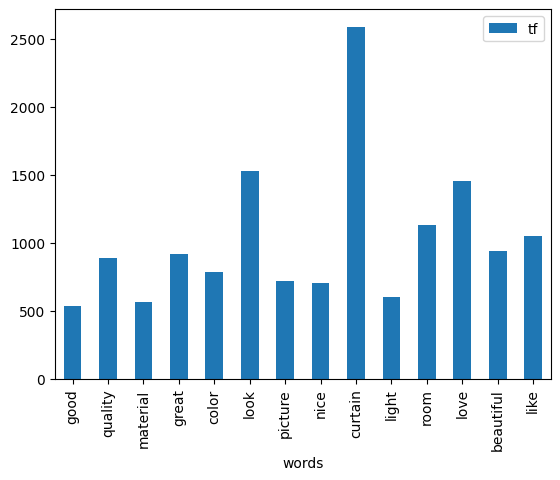

,words,tf
0,happy,196.00
1,good,535.00
2,quality,889.00
3,material,565.00
4,however,78.00


In [24]:
# tf dataframe'inin sütunlarını "words", "tf" şeklinde yeniden adlandırarak Barplot görselleştirmesinin yapılması.

tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

tf.head()

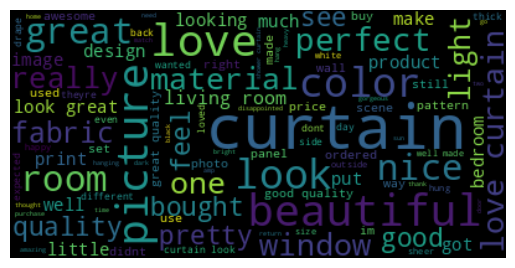

In [25]:
# WordCloud görselleştirme işlemi
# frekans olarak en yüksek kelimeler daha büyük geldi

text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Sentiment Analysis
* Gözetimsizleri gözetimli haline getirme
* kullanılan metinin taşıdığı duygu durumunu matematiksel olarak ifade etme durumu
* pozitif-negatif-nötr durumları belirtilir.

In [26]:
sia = SentimentIntensityAnalyzer()

In [27]:
# skor döndürsün
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))


0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [28]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])


0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.91
8   0.00
9   0.71
Name: Review, dtype: float64

In [29]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")


In [30]:
# ürünlere göre verilen puanların ortalamasını alma.
# NOT:SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.

df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   3.39
pos   4.59
Name: Star, dtype: float64

# Feature Engineering

In [31]:
df["Sentiment_Label"].value_counts()


Sentiment_Label
pos    4764
neg     847
Name: count, dtype: int64

In [32]:
# Bağımlı ve bağımsız değişkenleri belirleyerek datayı train test olarak ayrılması

# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

In [33]:
# TF-IDF Word Level-count vectordeki frekans standartlaştırması olduğu için kullanıldı

tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x) #öğrenip vektörize etsin
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x) #yapıyı dönüştür
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

# Modelling

In [34]:
# Lojistik regresyon modelini kurarak train datalarının fit edilmesi.
    
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)


In [35]:
# test verisinin vektörize eedilmiş halinin kullanılması.

y_pred = log_model.predict(x_test_tf_idf_word)

print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

         neg       0.33      0.90      0.49        82
         pos       0.99      0.89      0.94      1321

    accuracy                           0.89      1403
   macro avg       0.66      0.89      0.71      1403
weighted avg       0.95      0.89      0.91      1403



In [36]:
# 5 katlı cross validasyon işlemi yapılark başarım sonucunun elde edilmesi

cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()


0.8546034570411795

In [37]:
# Veride bulunan yorumlardan ratgele seçerek modele sorulması.

random_review = pd.Series(df["Review"].sample(1).values)
yeni_yorum = CountVectorizer().fit(train_x).transform(random_review)

pred = log_model.predict(yeni_yorum)

print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  heavy high quality beautiful send back room started coming together towards different overall design aesthetic didnt fit anymore 
 Prediction: ['pos']


# Random Forest Modelling 

In [38]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.8895297407219116